In [17]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, TimeDistributed, Dropout
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, LSTM,Dropout,Conv2D,TimeDistributed
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
#data = sio.loadmat('D:/lab_work_25/AUG/ecg_classification/trainingset.mat')

In [18]:
cls_0 = np.load("D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/Alpha/class_0.npy")
cls_1 = np.load("D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/Alpha/class_1.npy")
cls_2 = np.load("D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/Alpha/class_2.npy")
cls_3 = np.load("D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/Alpha/class_3.npy")
cls_4 = np.load("D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/Alpha/class_4.npy")
cls_5 = np.load("D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/Alpha/class_5.npy")
cls_6 = np.load("D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/Alpha/class_6.npy")
cls_7 = np.load("D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/Alpha/class_7.npy")
cls_8 = np.load("D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/Alpha/class_8.npy")

print(cls_0.shape)
print(cls_1.shape)
print(cls_2.shape)
print(cls_3.shape)
print(cls_4.shape)
print(cls_5.shape)
print(cls_6.shape)
print(cls_7.shape)
print(cls_8.shape)


(456, 128, 14)
(456, 128, 14)
(371, 128, 14)
(491, 128, 14)
(443, 128, 14)
(443, 128, 14)
(479, 128, 14)
(407, 128, 14)
(443, 128, 14)


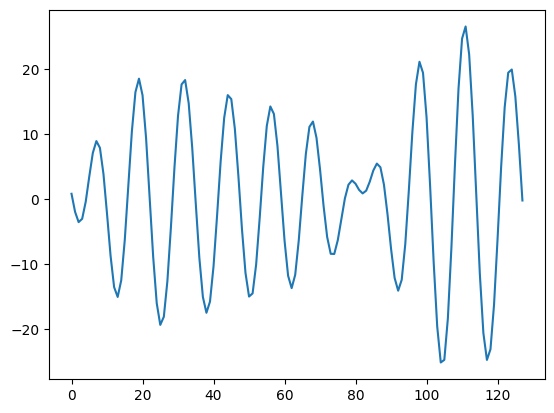

In [19]:
plt.plot(cls_6[15,:,0])

In [20]:
'''import numpy as np
from sklearn.preprocessing import StandardScaler

# all_data shape: (456, 128, 14)

# Reshape to (456*128, 14) so that each channel is a feature
reshaped = cls_0.reshape(-1, cls_0.shape[2])   # (456*128, 14)

# Fit scaler on all data
scaler = StandardScaler()
reshaped_z = scaler.fit_transform(reshaped)

# Reshape back to (456, 128, 14)
cls_0_z = reshaped_z.reshape(cls_0.shape)

print("After Z-score:", cls_0_z.shape)

# Take first 370 trials
cls_0_normalized = cls_0_z[:370]
print("First 370 trials shape:", cls_0_normalized.shape)'''


'import numpy as np\nfrom sklearn.preprocessing import StandardScaler\n\n# all_data shape: (456, 128, 14)\n\n# Reshape to (456*128, 14) so that each channel is a feature\nreshaped = cls_0.reshape(-1, cls_0.shape[2])   # (456*128, 14)\n\n# Fit scaler on all data\nscaler = StandardScaler()\nreshaped_z = scaler.fit_transform(reshaped)\n\n# Reshape back to (456, 128, 14)\ncls_0_z = reshaped_z.reshape(cls_0.shape)\n\nprint("After Z-score:", cls_0_z.shape)\n\n# Take first 370 trials\ncls_0_normalized = cls_0_z[:370]\nprint("First 370 trials shape:", cls_0_normalized.shape)'

In [21]:
'''import numpy as np
from sklearn.preprocessing import StandardScaler

# cls_1 shape: (456, 128, 14)

# Reshape to (456*128, 14) so that each channel is a feature
reshaped_1 = cls_1.reshape(-1, cls_1.shape[2])   # (456*128, 14)

# Fit scaler on all data (separately for cls_1)
scaler_1 = StandardScaler()
reshaped_1_z = scaler_1.fit_transform(reshaped_1)

# Reshape back to (456, 128, 14)
cls_1_z = reshaped_1_z.reshape(cls_1.shape)

print("After Z-score (cls_1):", cls_1_z.shape)

# Take first 450 trials
cls_1_normalized = cls_1_z[:370]
print("First 370 trials shape (cls_1):", cls_1_normalized.shape)'''


'import numpy as np\nfrom sklearn.preprocessing import StandardScaler\n\n# cls_1 shape: (456, 128, 14)\n\n# Reshape to (456*128, 14) so that each channel is a feature\nreshaped_1 = cls_1.reshape(-1, cls_1.shape[2])   # (456*128, 14)\n\n# Fit scaler on all data (separately for cls_1)\nscaler_1 = StandardScaler()\nreshaped_1_z = scaler_1.fit_transform(reshaped_1)\n\n# Reshape back to (456, 128, 14)\ncls_1_z = reshaped_1_z.reshape(cls_1.shape)\n\nprint("After Z-score (cls_1):", cls_1_z.shape)\n\n# Take first 450 trials\ncls_1_normalized = cls_1_z[:370]\nprint("First 370 trials shape (cls_1):", cls_1_normalized.shape)'

In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Let's assume you have cls_0, cls_1, ..., cls_9
all_classes = [cls_0, cls_1, cls_2, cls_3, cls_4, cls_5, cls_6, cls_7, cls_8]

normalized_classes = []

for i, cls in enumerate(all_classes):
    # Reshape for scaling
    reshaped = cls.reshape(-1, cls.shape[2])   # (trials*time, features)
    
    # Z-score normalization
    scaler = StandardScaler()
    reshaped_z = scaler.fit_transform(reshaped)
    
    # Reshape back to original
    cls_z = reshaped_z.reshape(cls.shape)
    print(f"After Z-score (cls_{i}):", cls_z.shape)
    
    # Take first 370 trials
    cls_norm = cls_z[:370]
    print(f"First 370 trials shape (cls_{i}):", cls_norm.shape)
    
    # Store
    normalized_classes.append(cls_norm)

# Concatenate all classes
eeg_data = np.concatenate(normalized_classes, axis=0)
print("Final concatenated shape:", eeg_data.shape)

After Z-score (cls_0): (456, 128, 14)
First 370 trials shape (cls_0): (370, 128, 14)
After Z-score (cls_1): (456, 128, 14)
First 370 trials shape (cls_1): (370, 128, 14)
After Z-score (cls_2): (371, 128, 14)
First 370 trials shape (cls_2): (370, 128, 14)
After Z-score (cls_3): (491, 128, 14)
First 370 trials shape (cls_3): (370, 128, 14)
After Z-score (cls_4): (443, 128, 14)
First 370 trials shape (cls_4): (370, 128, 14)
After Z-score (cls_5): (443, 128, 14)
First 370 trials shape (cls_5): (370, 128, 14)
After Z-score (cls_6): (479, 128, 14)
First 370 trials shape (cls_6): (370, 128, 14)
After Z-score (cls_7): (407, 128, 14)
First 370 trials shape (cls_7): (370, 128, 14)
After Z-score (cls_8): (443, 128, 14)
First 370 trials shape (cls_8): (370, 128, 14)
Final concatenated shape: (3330, 128, 14)


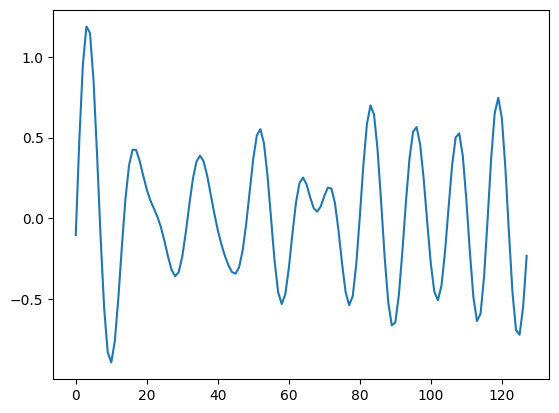

In [23]:
plt.plot(eeg_data[1005,:,0])

In [24]:
'''eeg_data=np.concatenate((cls_0_normalized,cls_1_normalized),axis=0)
eeg_data.shape'''

'eeg_data=np.concatenate((cls_0_normalized,cls_1_normalized),axis=0)\neeg_data.shape'

In [25]:
import numpy as np

# Parameters
time_points = 128
num_classes = 9
samples_per_class = 370  # or 450 like before, adjust as needed

# Base signals
zero_signal = np.zeros(time_points)
ramp_signal = np.linspace(0, 4, time_points)

all_classes = []

for c in range(num_classes):
    # Create (128, num_classes) template
    template = np.zeros((time_points, num_classes))
    template[:, c] = ramp_signal   # ramp only in channel c, rest zero

    # Repeat for samples_per_class trials
    block = np.tile(template, (samples_per_class, 1, 1))  # (samples, 128, num_classes)

    all_classes.append(block)

# Concatenate all class blocks
final_signal = np.concatenate(all_classes, axis=0)  # (num_classes*samples, 128, num_classes)

print("Final shape:", final_signal.shape)


Final shape: (3330, 128, 9)


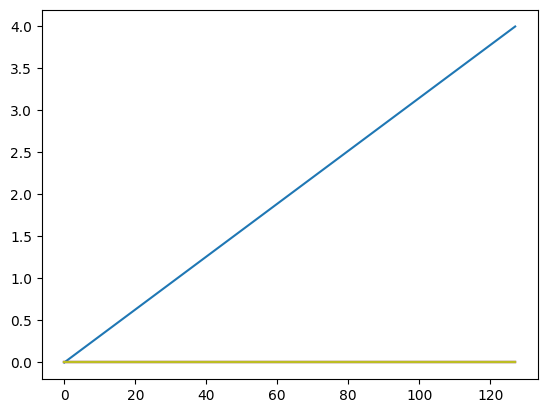

In [26]:
plt.plot(final_signal[300,:,:])

In [27]:
'''import numpy as np

# Define base signals
time_points = 128
zero_signal = np.zeros(time_points)
ramp_signal = np.linspace(0, 4, time_points)   # ramp from 0 → 4

# First 450 samples: [zero, ramp]
block1 = np.stack([zero_signal, ramp_signal], axis=-1)  # shape (128,2)
block1 = np.tile(block1, (450,1,1))                     # shape (450,128,2)

# Next 450 samples: [ramp, zero]
block2 = np.stack([ramp_signal, zero_signal], axis=-1)  # shape (128,2)
block2 = np.tile(block2, (450,1,1))                     # shape (450,128,2)

# Concatenate to get final signal
final_signal = np.concatenate([block1, block2], axis=0)  # shape (900,128,2)

print("Final shape:", final_signal.shape)'''


'import numpy as np\n\n# Define base signals\ntime_points = 128\nzero_signal = np.zeros(time_points)\nramp_signal = np.linspace(0, 4, time_points)   # ramp from 0 → 4\n\n# First 450 samples: [zero, ramp]\nblock1 = np.stack([zero_signal, ramp_signal], axis=-1)  # shape (128,2)\nblock1 = np.tile(block1, (450,1,1))                     # shape (450,128,2)\n\n# Next 450 samples: [ramp, zero]\nblock2 = np.stack([ramp_signal, zero_signal], axis=-1)  # shape (128,2)\nblock2 = np.tile(block2, (450,1,1))                     # shape (450,128,2)\n\n# Concatenate to get final signal\nfinal_signal = np.concatenate([block1, block2], axis=0)  # shape (900,128,2)\n\nprint("Final shape:", final_signal.shape)'

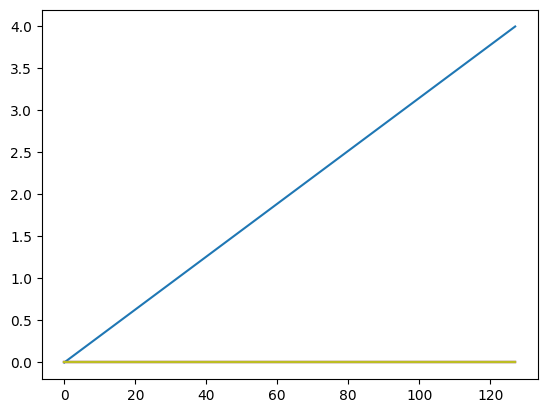

In [28]:
plt.plot(final_signal[50,:,:])

In [29]:
from sklearn.model_selection import train_test_split
# Train-test split with shuffling
X_train, X_test, y_train, y_test = train_test_split(
    eeg_data, final_signal, test_size=0.2, shuffle=True, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2664, 128, 14)
y_train shape: (2664, 128, 9)
X_test shape: (666, 128, 14)
y_test shape: (666, 128, 9)


In [30]:
X_train=X_train[:2660,:]
y_train=y_train[:2660]
print("After slicing - X_train shape:", X_train.shape)
print("After slicing - y_train shape:", y_train.shape)

After slicing - X_train shape: (2660, 128, 14)
After slicing - y_train shape: (2660, 128, 9)


In [31]:
'''X_cls0_inter=eeg_data[:20]
X_cls1_inter=eeg_data[600:620]
print(X_cls0_inter.shape)
print(X_cls1_inter.shape)'''

'X_cls0_inter=eeg_data[:20]\nX_cls1_inter=eeg_data[600:620]\nprint(X_cls0_inter.shape)\nprint(X_cls1_inter.shape)'

In [32]:
'''plt.plot(cls_0_normalized[115,:,0])
plt.plot(cls_1_normalized[115,:,0])'''

'plt.plot(cls_0_normalized[115,:,0])\nplt.plot(cls_1_normalized[115,:,0])'

In [33]:
'''x_train = np.squeeze(x_train, axis=-1)
print(x_train.shape)'''

'x_train = np.squeeze(x_train, axis=-1)\nprint(x_train.shape)'

In [34]:
'''import numpy as np

# Example batch size and ytrain shape for demonstration
batch_size = 45083
ytrain = ytrain   # Generate a random ytrain for demonstration

# Initialize an empty list to store the results for all samples
all_samples = []

# Iterate over each sample in the batch
for sample in ytrain:
    ans = []
    for i in sample:
        if i == 1:
            s = np.linspace(0, 0.25, 32)
            ans.append(s)
        else:
            s = np.zeros(32)
            ans.append(s)
    
    # Convert the list to a NumPy array and then transpose it to get (32, 10)
    ans_array = np.array(ans).T
    all_samples.append(ans_array)

# Convert the list of all_samples to a NumPy array
all_samples_array = np.array(all_samples)  # This should have shape (45083, 32, 10)

# Print the shape to verify
print("Shape of the final array:", all_samples_array.shape)

# Optionally, print the first sample to verify its content
print("First sample:\n", all_samples_array[0])'''


'import numpy as np\n\n# Example batch size and ytrain shape for demonstration\nbatch_size = 45083\nytrain = ytrain   # Generate a random ytrain for demonstration\n\n# Initialize an empty list to store the results for all samples\nall_samples = []\n\n# Iterate over each sample in the batch\nfor sample in ytrain:\n    ans = []\n    for i in sample:\n        if i == 1:\n            s = np.linspace(0, 0.25, 32)\n            ans.append(s)\n        else:\n            s = np.zeros(32)\n            ans.append(s)\n    \n    # Convert the list to a NumPy array and then transpose it to get (32, 10)\n    ans_array = np.array(ans).T\n    all_samples.append(ans_array)\n\n# Convert the list of all_samples to a NumPy array\nall_samples_array = np.array(all_samples)  # This should have shape (45083, 32, 10)\n\n# Print the shape to verify\nprint("Shape of the final array:", all_samples_array.shape)\n\n# Optionally, print the first sample to verify its content\nprint("First sample:\n", all_samples_array

In [35]:
import tensorflow as tf
import numpy as np

# =====================================
# Utilities: adjacency (local coupling)
# =====================================

def build_ring_adjacency(units: int, neighbors: int = 2, periodic: bool = True) -> tf.Tensor:
    
    adj = np.zeros((units, units), dtype=np.float32)
    for i in range(units):
        for d in range(1, neighbors + 1):
            if periodic:
                j1 = (i - d) % units
                j2 = (i + d) % units
                adj[i, j1] = 1.0
                adj[i, j2] = 1.0
            else:
                j1 = i - d
                j2 = i + d
                if 0 <= j1 < units:
                    adj[i, j1] = 1.0
                if 0 <= j2 < units:
                    adj[i, j2] = 1.0
    np.fill_diagonal(adj, 0.0)
    return tf.convert_to_tensor(adj, dtype=tf.float32)


def zero_diag(x: tf.Tensor) -> tf.Tensor:
    n = tf.shape(x)[0]
    return x * (1.0 - tf.eye(n, dtype=x.dtype))


# =====================================
# Kuramoto loop: local coupling + Hebbian
# =====================================

@tf.function
def kuramoto_loop_local_hebb(
    X_r: tf.Tensor,
    X_i: tf.Tensor,
    omegas: tf.Tensor,
    num_steps: int,
    K: tf.Variable,
    adjacency: tf.Tensor,
    *,
    dt: float = 1.0/128.0,
    input_scaler: float = 2.0,
    eta: float = 0.01,          # Hebbian learning rate
    decay: float = 0.001,       # weight decay to prevent blow-up
    k_clip: float = 1.0,        # clip |K_ij| <= k_clip
    wrap_phase: bool = True,
    normalize_rows: bool = False,
    symmetric_K: bool = True,
) -> tuple[tf.Tensor, tf.Variable]:
    
    batch = tf.shape(X_r)[0]
    units = tf.shape(X_r)[-1]

    phi_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
    phis = tf.zeros((batch, units), dtype=tf.float32)  # initial phase = 0

    # Precompute for normalization if requested
    if normalize_rows:
        deg = tf.reduce_sum(adjacency, axis=1, keepdims=True)  # (units, 1)
        deg = tf.maximum(deg, 1.0)

    two_pi = tf.constant(2.0 * np.pi, dtype=tf.float32)
    pi = tf.constant(np.pi, dtype=tf.float32)

    for t in tf.range(num_steps):
        # External input projection on phase (driven oscillator)
        input_r = input_scaler * X_r[:, t, :] * tf.math.cos(phis)
        input_i = input_scaler * X_i[:, t, :] * tf.math.sin(phis)

        # Coupling term: sum_j K_ij * sin(phi_j - phi_i)
        # delta[i,j] = phi_i - phi_j (batch, i, j)
        delta = tf.expand_dims(phis, 1) - tf.expand_dims(phis, 2)
        # sin(phi_j - phi_i) = -sin(phi_i - phi_j) = -sin(delta)
        sin_term = -tf.math.sin(delta)  # (batch, i, j)
        # multiply by masked K (i,j) and sum over j
        K_eff = adjacency * K  # (i, j)
        if normalize_rows:
            K_eff = K_eff / deg  # row-normalize by degree
        coup = tf.einsum('ij,bij->bi', K_eff, sin_term)  # (batch, i)

        # Euler step for phase update
        dphi = (omegas + input_r - input_i + coup) * dt
        phis = phis + dphi

        # Optionally wrap phases to [-pi, pi)
        if wrap_phase:
            phis = ((phis + pi) % two_pi) - pi

        # Hebbian plasticity update (average over batch at current t)
        # hebb[i,j] ~ cos(phi_i - phi_j)
        hebb = tf.reduce_mean(tf.math.cos(delta), axis=0)  # (i, j)
        dK = eta * (adjacency * hebb) - decay * K
        K.assign_add(dK)

        # Stabilize: enforce symmetry if desired, zero diagonal, clip
        if symmetric_K:
            K.assign(0.5 * (K + tf.transpose(K)))
        K.assign(zero_diag(K))
        if k_clip is not None:
            K.assign(tf.clip_by_value(K, -k_clip, k_clip))

        phi_arr = phi_arr.write(phi_arr.size(), phis)

    phis = tf.transpose(phi_arr.stack(), [1, 0, 2])  # (batch, time, units)
    return phis, K


# =====================================
# Kuramoto Layer with local Hebbian K
# =====================================

class KuramotoLocal(tf.keras.layers.Layer):
    def __init__(self,
                 units: int,
                 num_steps: int,
                 *,
                 min_omega: float = 8.1,
                 max_omega: float = 12.1,
                 train_omegas: bool = True,
                 neighbors: int = 2,
                 periodic: bool = True,
                 eta: float = 0.001,
                 decay: float = 0.001,
                 k_clip: float = 1.0,
                 normalize_rows: bool = False,
                 symmetric_K: bool = True,
                 dt: float = 1.0/128.0,
                 input_scaler: float = 2.0,
                 wrap_phase: bool = True,
                 name: str = None,
                 **kwargs):
        super().__init__(name=name, **kwargs)
        self.units = units
        self.num_steps = num_steps
        self.min_omega = min_omega
        self.max_omega = max_omega
        self.train_omegas = train_omegas
        self.neighbors = neighbors
        self.periodic = periodic
        self.eta = eta
        self.decay = decay
        self.k_clip = k_clip
        self.normalize_rows = normalize_rows
        self.symmetric_K = symmetric_K
        self.dt = dt
        self.input_scaler = input_scaler
        self.wrap_phase = wrap_phase

        # Intrinsic frequencies parameter (1, units)
        omega_init = tf.random.uniform((1, units), -1, 1)
        self.omegas = tf.Variable(omega_init, trainable=train_omegas, name="omegas")

        # Coupling matrix (units, units), updated by Hebbian rule inside call
        k_init = tf.random.uniform((units, units), -0.05, 0.05)
        self.K = tf.Variable(k_init, trainable=False, name="K")

        # Adjacency (mask): only local neighbors
        self.adjacency = build_ring_adjacency(units, neighbors, periodic)

    def call(self, X_r: tf.Tensor, X_i: tf.Tensor):
        # Map omegas to [min_omega, max_omega]
        omega_range = self.max_omega - self.min_omega
        omega_inp = tf.sigmoid(0.5 * self.omegas) * omega_range + self.min_omega

        phis, _ = kuramoto_loop_local_hebb(
            X_r, X_i, omega_inp, self.num_steps,
            self.K, self.adjacency,
            dt=self.dt,
            input_scaler=self.input_scaler,
            eta=self.eta,
            decay=self.decay,
            k_clip=self.k_clip,
            wrap_phase=self.wrap_phase,
            normalize_rows=self.normalize_rows,
            symmetric_K=self.symmetric_K,
        )

        z_real = tf.math.cos(phis)
        z_imag = tf.math.sin(phis)
        return z_real, z_imag


# =====================================
# Example end-to-end model using the layer
# =====================================

class Model(tf.keras.Model):
    def __init__(self, units1, units2, units3, units4,  **kwargs):
        super().__init__(**kwargs)
        # Feature projection for real/imag pathways
        self.d1_r = tf.keras.layers.Dense(units1, activation='relu')
        self.d1_i = tf.keras.layers.Dense(units1, activation='relu')

        # Project to oscillator count (units2) for each pathway
        self.proj_r = tf.keras.layers.Dense(units2, activation=None)
        self.proj_i = tf.keras.layers.Dense(units2, activation=None)

        # Local Kuramoto oscillator block
        self.osc1 = KuramotoLocal(
            units=units2,
            num_steps=128,
            min_omega=8.1,
            max_omega=12.1,
            train_omegas=True,
            neighbors=2,          # 2 on each side => 4 neighbors total
            periodic=True,
            eta=0.001,
            decay=0.001,
            k_clip=1.0,
            normalize_rows=False,
            symmetric_K=True,
            dt=1.0/128.0,
            input_scaler=2.0,
            wrap_phase=True,
        )

        # Post-oscillator dense on each channel (real/imag separately)
        self.d_r = tf.keras.layers.Dense(units3, activation='tanh')
        self.dropout_r = tf.keras.layers.Dropout(0.3)
        self.d_i = tf.keras.layers.Dense(units3, activation='tanh')
        self.dropout_i = tf.keras.layers.Dropout(0.3)

        # Shared dense and output
        self.dense = tf.keras.layers.Dense(units4, activation='linear')
        #self.out_dense = tf.keras.layers.Dense(units5, activation='linear')

    def call(self, X: tf.Tensor,training=False):
        # X: (batch, time, features)
        td = tf.keras.layers.TimeDistributed

        # Pathway feature extraction
        out1_r = td(self.d1_r)(X)
        out1_i = td(self.d1_i)(X)

        # Project to oscillator dimension (units2)
        X_r = td(self.proj_r)(out1_r)
        X_i = td(self.proj_i)(out1_i)

        # Kuramoto oscillator (returns cos(phi), sin(phi))
        z1_r, z1_i = self.osc1(X_r, X_i)

        # Post-oscillator processing (per time step)
        out2_r = td(self.d_r)(z1_r)
        out2_r = td(self.dropout_r)(out2_r, training=training)
        out2_i = td(self.d_i)(z1_i)
        out2_i = td(self.dropout_i)(out2_i, training=training)

        # Concatenate real + imag pathways
        concat_inp = tf.concat([out2_r, out2_i], axis=-1)

        # Shared dense + output
        denseout = td(self.dense)(concat_inp)
        #out_final = td(self.out_dense)(denseout)
        return denseout


# ==================
# Minimal smoke test
# ==================
'''if __name__ == "__main__":
    # Dummy data: batch=4, time=300, features=16
    batch, time_steps, features = 4, 300, 16
    x_dummy = tf.random.normal((batch, time_steps, features))

    # Build model
    model = Model(units1=64, units2=32, units3=30, units4=10, units5=1)

    # Forward pass
    y = model(x_dummy)
    print("Output shape:", y.shape)'''

    # Example compile/fit (with dummy target)
    # optimizer = tf.keras.optimizers.Adam(1e-3)
    # model.compile(optimizer, loss='mse')
    # y_dummy = tf.random.normal((batch, time_steps, 1))
    # model.fit(x_dummy, y_dummy, epochs=2)


'if __name__ == "__main__":\n    # Dummy data: batch=4, time=300, features=16\n    batch, time_steps, features = 4, 300, 16\n    x_dummy = tf.random.normal((batch, time_steps, features))\n\n    # Build model\n    model = Model(units1=64, units2=32, units3=30, units4=10, units5=1)\n\n    # Forward pass\n    y = model(x_dummy)\n    print("Output shape:", y.shape)'

In [36]:
model = Model(100,100,10,9)


In [37]:
model.build(input_shape=(1000, 128, 14))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  1500      
                                                                 
 dense_1 (Dense)             multiple                  1500      
                                                                 
 dense_2 (Dense)             multiple                  10100     
                                                                 
 dense_3 (Dense)             multiple                  10100     
                                                                 
 kuramoto_local (KuramotoLoc  multiple                 10100     
 al)                                                             
                                                                 
 dense_4 (Dense)             multiple                  1010      
                                                             

In [38]:
optimizer = tf.keras.optimizers.Adam(0.001)


model.compile(optimizer, 'mse', metrics=['accuracy'])

In [39]:
'''p=X_train_train[:45000,:,:].shape
print(p)'''

'p=X_train_train[:45000,:,:].shape\nprint(p)'

In [40]:
'''all_samples_array.shape
x=all_samples_array[:45000,:,:]
print(x.shape)'''

'all_samples_array.shape\nx=all_samples_array[:45000,:,:]\nprint(x.shape)'

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [42]:
import os

# directory where weights will be saved
save_dir = r"D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/model_weights"
os.makedirs(save_dir, exist_ok=True)   # create folder if missing

weights_path = os.path.join(save_dir, "audio_visual_all.h5")
print("Weights will be saved at:", weights_path)

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_weights = ModelCheckpoint(
    filepath=weights_path,
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min",
    verbose=1
)

history_linear_4 = model.fit(
    X_train,
    y_train,
    epochs=400,
    batch_size=12,
    validation_split=0.2,
    callbacks=[checkpoint_weights]
)




Weights will be saved at: D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/model_weights\audio_visual_all.h5
Epoch 1/400
178/178 [==============================] - ETA: 0s - loss: 0.6228 - accuracy: 0.1147
Epoch 1: val_loss improved from inf to 0.54496, saving model to D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/model_weights\audio_visual_all.h5
178/178 [==============================] - 88s 379ms/step - loss: 0.6228 - accuracy: 0.1147 - val_loss: 0.5450 - val_accuracy: 0.1130
Epoch 2/400
178/178 [==============================] - ETA: 0s - loss: 0.5461 - accuracy: 0.1244
Epoch 2: val_loss improved from 0.54496 to 0.53383, saving model to D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/model_weights\audio_visual_all.h5
178/178 [==============================] - 82s 460ms/step - loss: 0.5461 - accuracy: 0.1244 - val_loss: 0.5338 - val_accuracy: 0.1292
Epoch 3/400
178/178 [==============================] - ETA: 0s - loss: 0.5343 - accuracy:

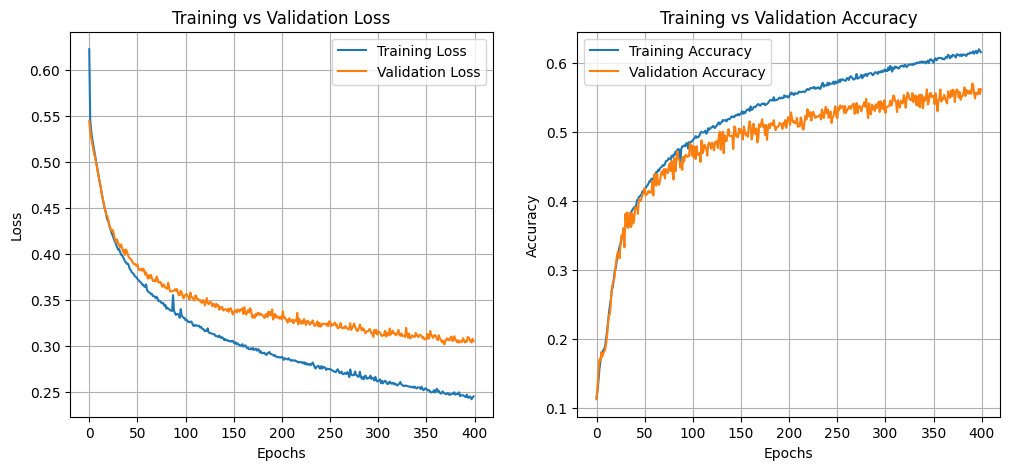

In [43]:
# Loss curve
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_linear_4.history['loss'], label='Training Loss')
plt.plot(history_linear_4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history_linear_4.history['accuracy'], label='Training Accuracy')
plt.plot(history_linear_4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [44]:
'''ytest=eed_data['y_test']
x_test = np.moveaxis(eed_data['x_test'], 1, 2)
x_test = scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)
x_test = np.squeeze(x_test)
x_test.shape'''

"ytest=eed_data['y_test']\nx_test = np.moveaxis(eed_data['x_test'], 1, 2)\nx_test = scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)\nx_test = np.squeeze(x_test)\nx_test.shape"

In [45]:
model.load_weights("D:/lab_work_25/AUG/audio visual eeg/eeg_classifier/Rest Vs Yes/model_weights/audio_visual_all.h5")

In [46]:
'''import numpy as np

# Example batch size and ytrain shape for demonstration
batch_size = 5642
ytest = ytest   # Generate a random ytrain for demonstration

# Initialize an empty list to store the results for all samples
all_samples_test = []

# Iterate over each sample in the batch
for sample in ytest:
    ans = []
    for i in sample:
        if i == 1:
            s = np.linspace(0, 0.25, 32)
            ans.append(s)
        else:
            s = np.zeros(32)
            ans.append(s)
    
    # Convert the list to a NumPy array and then transpose it to get (32, 10)
    ans_array = np.array(ans).T
    all_samples_test.append(ans_array)

# Convert the list of all_samples to a NumPy array
all_samples_test_array = np.array(all_samples_test)  # This should have shape (45083, 32, 10)

# Print the shape to verify
print("Shape of the final array:", all_samples_test_array.shape)

# Optionally, print the first sample to verify its content
print("First sample:\n", all_samples_test_array[0])'''


'import numpy as np\n\n# Example batch size and ytrain shape for demonstration\nbatch_size = 5642\nytest = ytest   # Generate a random ytrain for demonstration\n\n# Initialize an empty list to store the results for all samples\nall_samples_test = []\n\n# Iterate over each sample in the batch\nfor sample in ytest:\n    ans = []\n    for i in sample:\n        if i == 1:\n            s = np.linspace(0, 0.25, 32)\n            ans.append(s)\n        else:\n            s = np.zeros(32)\n            ans.append(s)\n    \n    # Convert the list to a NumPy array and then transpose it to get (32, 10)\n    ans_array = np.array(ans).T\n    all_samples_test.append(ans_array)\n\n# Convert the list of all_samples to a NumPy array\nall_samples_test_array = np.array(all_samples_test)  # This should have shape (45083, 32, 10)\n\n# Print the shape to verify\nprint("Shape of the final array:", all_samples_test_array.shape)\n\n# Optionally, print the first sample to verify its content\nprint("First sample:\

In [47]:
out_test = model.predict(X_test,batch_size=1)


666/666 [==============================] - 37s 54ms/step


In [48]:
out_test.shape

(666, 128, 9)

In [49]:
y_test.shape

(666, 128, 9)

In [50]:
import numpy as np

def calculate_accuracy(out_test, all_samples_test_array):
    # Initialize the counter
    c_test = 0
    # Number of samples
    num_samples = out_test.shape[0]

    # Iterate over each sample
    for ii in range(num_samples):
        # Find the index of the maximum value in the current row of out_test
        a_test=sum(out_test[ii,:])
        indices_test = np.argmax(a_test)

        # Find the index of the maximum value in the current row of all_samples_test_array
        b_test=sum(all_samples_test_array[ii,:])
        indices1_test = np.argmax(b_test)

        # Check if the indices match
        if indices_test == indices1_test:
            c_test += 1

    # Calculate the accuracy
    accuracy = c_test / num_samples
    return accuracy

# Example usage
out_test1 = out_test  # Example data, replace with actual data
all_samples_test_array1 = y_test  # Example data, replace with actual data

accuracy = calculate_accuracy(out_test1, all_samples_test_array1)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7312312312312312


In [51]:
X_test

array([[[ 1.56619569e-01,  1.96526898e-01,  5.62360057e-03, ...,
          1.45244068e-01, -2.00931751e-01,  1.53931209e-01],
        [ 3.93533221e-01,  6.58227162e-01,  4.36551702e-02, ...,
          2.50025318e-01, -1.48912799e+00,  6.14057590e-01],
        [ 6.51997073e-01,  1.10188117e+00,  6.59253461e-02, ...,
          4.31350180e-01, -2.19662239e+00,  1.05137235e+00],
        ...,
        [ 5.49900128e-01,  1.05867007e-01,  2.84656591e-01, ...,
          2.38665191e-01,  2.97423779e-01,  5.95371128e-01],
        [ 1.25055019e-01, -1.95830994e-01,  2.06342000e-01, ...,
          7.05333255e-03,  4.12586160e-01,  2.08058618e-01],
        [-2.52513097e-01, -3.69731245e-01,  8.09386130e-02, ...,
         -1.67064245e-01,  5.13291185e-01, -1.57338234e-01]],

       [[-2.95874528e-02,  2.63457223e-02, -2.60375984e-02, ...,
          6.43548400e-03,  2.55636099e-02,  8.26301013e-03],
        [-1.67341122e-01, -2.23521246e-01, -2.57656956e-01, ...,
         -2.49560516e-01, -3.51346088e

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

# ==============================
# Extract coupling matrix helper
# ==============================
def get_coupling_matrix(model, X_batch):
    """
    Runs a forward pass with X_batch and returns the learned coupling matrix K.
    """
    # Reset K if you want a fresh Hebbian update before each forward pass
    model.osc1.K.assign(tf.zeros_like(model.osc1.K))

    # Run forward pass (testing mode)
    _ = model(X_batch, training=False)

    # Extract final K (after Hebbian updates)
    return model.osc1.K.numpy()

# ==============================
# Example usage with test data
# ==============================
# Suppose you have test data separated into two classes
# X_class0, X_class1 with shapes (batch, time, features)

# Take a few samples from each class
K0 = get_coupling_matrix(model, X_cls0_inter)   # coupling for class 0
K1 = get_coupling_matrix(model, X_cls1_inter)   # coupling for class 1

# Compute difference
K_diff = K1 - K0

# ==============================
# Visualization
# ==============================
plt.figure(figsize=(15,5))
for i, (mat, title) in enumerate(zip([K0, K1, K_diff],
                                     ["Class 0 Coupling (K0)", 
                                      "Class 1 Coupling (K1)", 
                                      "Difference (K1 - K0)"])):
    plt.subplot(1,3,i+1)
    sns.heatmap(mat, cmap="coolwarm", center=0, square=True, cbar=True)
    plt.title(title)
plt.tight_layout()
plt.show()

# ==============================
# Optional quantitative metrics
# ==============================
fro_norm = np.linalg.norm(K_diff)
print("Frobenius norm of difference:", fro_norm)


NameError: name 'X_cls0_inter' is not defined

C:\Users\SAYANG~1\AppData\Local\Temp/ipykernel_30788/2088178953.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


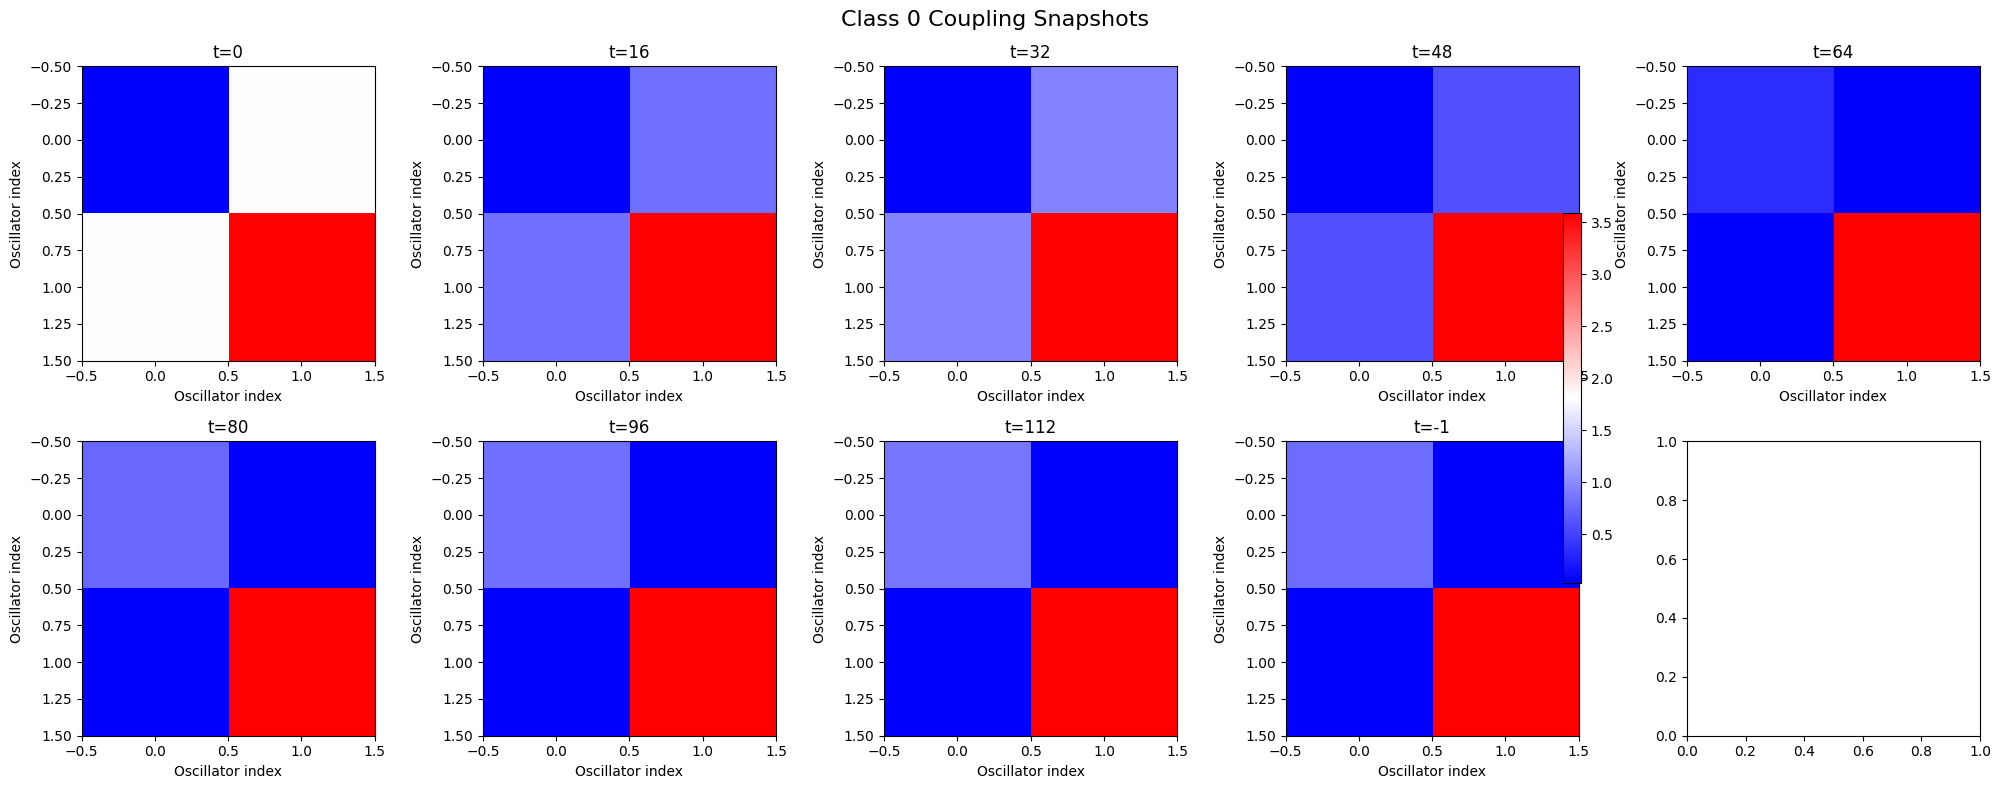

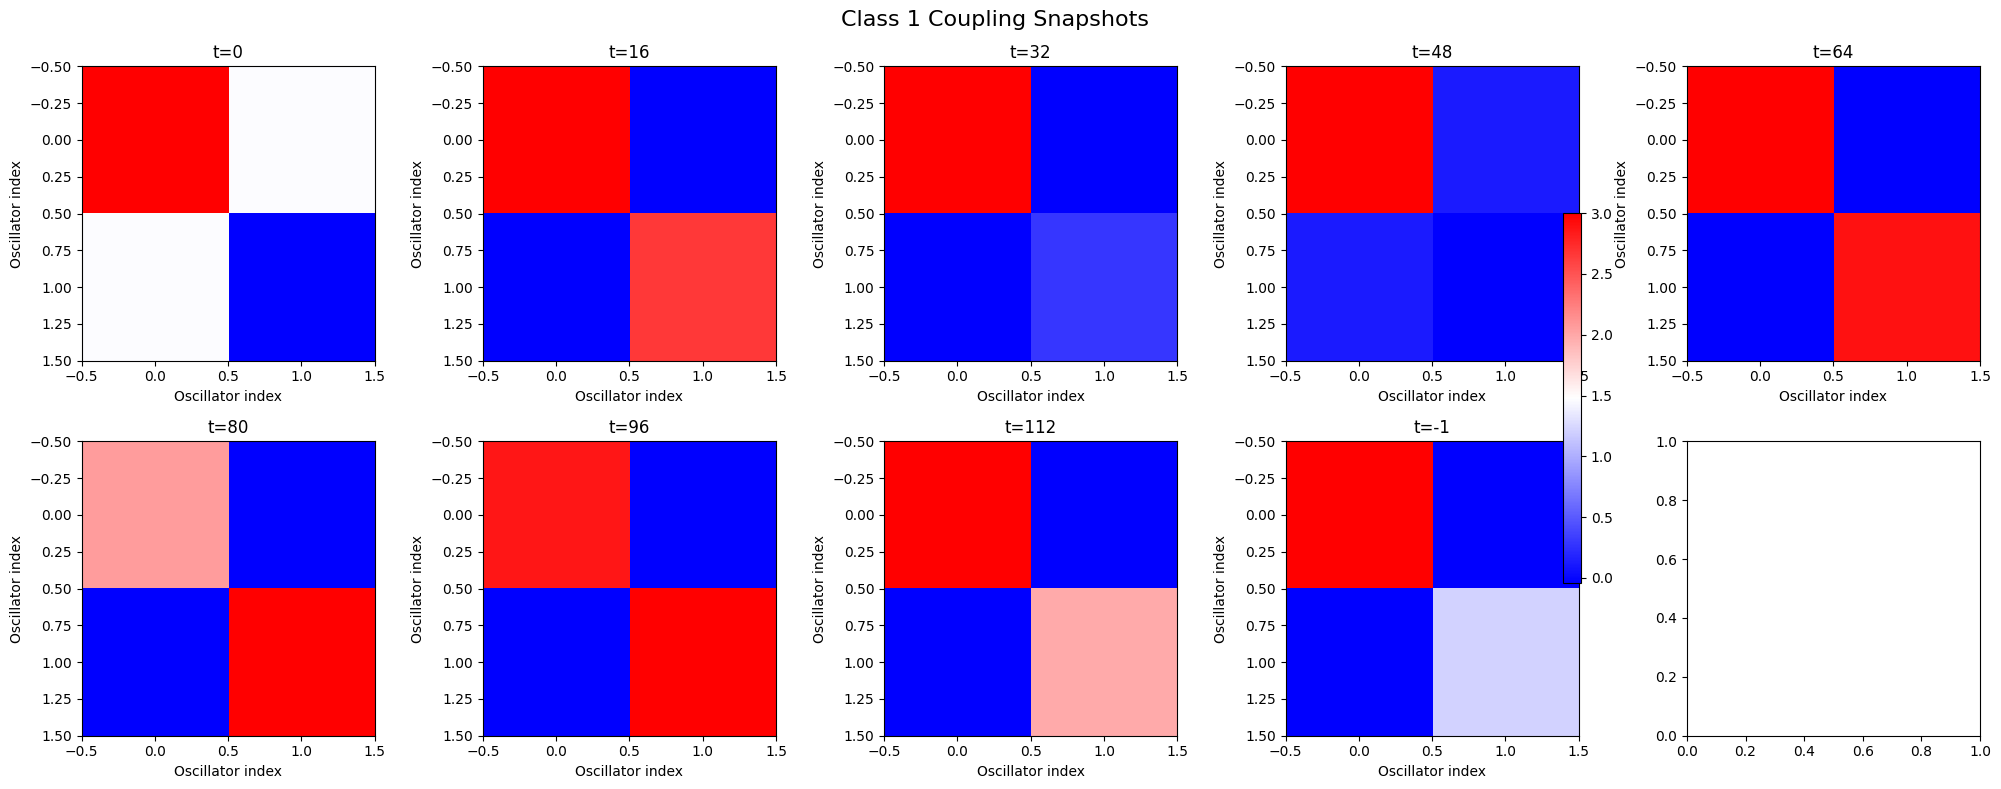

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# ======================================================
# Hebbian update
# ======================================================
def hebbian_update(K, x, lr=0.01):
    """
    One step Hebbian update of coupling matrix.
    """
    x = x.reshape(-1, 1)   # column vector
    delta_K = lr * (x @ x.T)
    return K + delta_K

# ======================================================
# Compute coupling matrices over time for one trial
# ======================================================
def get_coupling_matrices_over_time(model, X_trial, lr=0.01):
    """
    Given a trial, evolve Hebbian coupling matrix K(t) over time.
    """
    states = model(X_trial, training=False).numpy()  # (1, T, N)
    states = states[0]  # (T, N)

    N = states.shape[1]
    K = np.zeros((N, N))
    Ks = []

    for t in range(states.shape[0]):
        x_t = states[t]
        K = hebbian_update(K, x_t, lr=lr)
        Ks.append(K.copy())

    return np.array(Ks)  # (T, N, N)

# ======================================================
# Average coupling snapshots across trials
# ======================================================
def get_avg_coupling_snapshots(model, X_trials, time_steps, lr=0.01):
    snapshots = {t: [] for t in time_steps}

    for trial in X_trials:
        Ks = get_coupling_matrices_over_time(model, trial[np.newaxis, ...], lr=lr)
        T = len(Ks)
        for t in time_steps:
            t_idx = t if t >= 0 else T + t
            if 0 <= t_idx < T:
                snapshots[t].append(Ks[t_idx])

    # Average across trials
    for t in snapshots:
        if len(snapshots[t]) > 0:
            snapshots[t] = np.mean(snapshots[t], axis=0)
        else:
            snapshots[t] = None
    return snapshots

# ======================================================
# Plot snapshots in a grid
# ======================================================
def plot_snapshots_grid(snapshots, title_prefix=""):
    n = len([k for k in snapshots if snapshots[k] is not None])
    cols = min(5, n)   # up to 5 columns per row
    rows = int(np.ceil(n / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
    if rows == 1 and cols == 1:
        axes = np.array([[axes]])
    elif rows == 1:
        axes = np.array([axes])

    for ax, (t, K) in zip(axes.flatten(), snapshots.items()):
        if K is None:
            ax.axis("off")
            continue
        im = ax.imshow(K, cmap="bwr", aspect="auto")
        ax.set_title(f"t={t}")
        ax.set_xlabel("Oscillator index")
        ax.set_ylabel("Oscillator index")
    fig.suptitle(f"{title_prefix} Coupling Snapshots", fontsize=16)
    fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
    plt.tight_layout()
    plt.show()

# ======================================================
# Helper: create evenly spaced snapshots
# ======================================================
def make_time_steps(total_points=128, n_snapshots=8, include_last=True):
    """
    Split total_points into n_snapshots evenly spaced time steps.
    Optionally include the very last time step (-1).
    """
    step = total_points // n_snapshots
    times = list(range(0, total_points, step))
    if include_last and times[-1] != total_points - 1:
        times.append(-1)
    return times

# ======================================================
# Example usage
# ======================================================

# Example: get 8 evenly spaced snapshots + last step
time_steps = make_time_steps(total_points=128, n_snapshots=8, include_last=True)

# Average snapshots across first 20 trials of each class
snapshots_class0 = get_avg_coupling_snapshots(model, X_cls0_inter[:20], time_steps, lr=0.01)
snapshots_class1 = get_avg_coupling_snapshots(model, X_cls1_inter[:20], time_steps, lr=0.01)

# Plot both classes
plot_snapshots_grid(snapshots_class0, title_prefix="Class 0")
plot_snapshots_grid(snapshots_class1, title_prefix="Class 1")


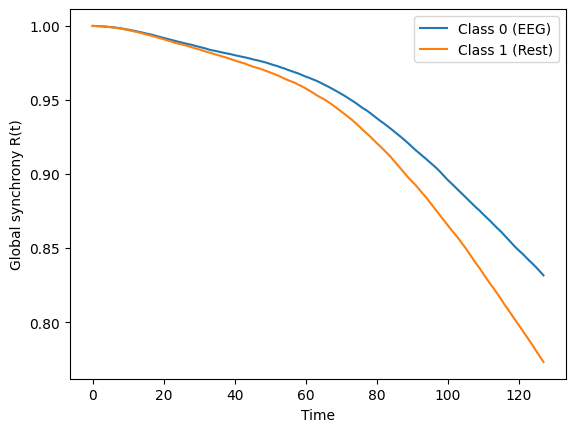

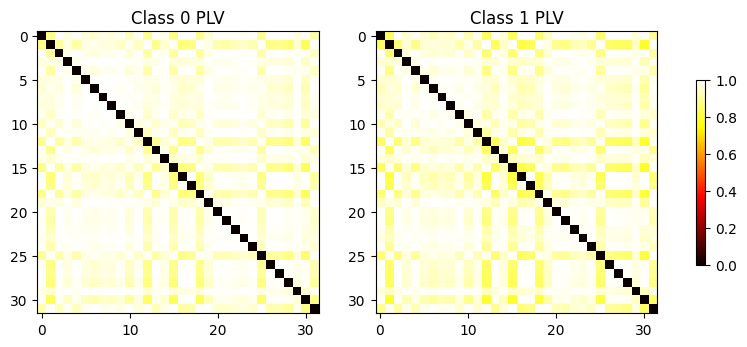

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# =====================================
# Utilities: adjacency (local coupling)
# =====================================

def build_ring_adjacency(units: int, neighbors: int = 2, periodic: bool = True) -> tf.Tensor:
    adj = np.zeros((units, units), dtype=np.float32)
    for i in range(units):
        for d in range(1, neighbors + 1):
            if periodic:
                j1 = (i - d) % units
                j2 = (i + d) % units
                adj[i, j1] = 1.0
                adj[i, j2] = 1.0
            else:
                j1 = i - d
                j2 = i + d
                if 0 <= j1 < units:
                    adj[i, j1] = 1.0
                if 0 <= j2 < units:
                    adj[i, j2] = 1.0
    np.fill_diagonal(adj, 0.0)
    return tf.convert_to_tensor(adj, dtype=tf.float32)

def zero_diag(x: tf.Tensor) -> tf.Tensor:
    n = tf.shape(x)[0]
    return x * (1.0 - tf.eye(n, dtype=x.dtype))


# =====================================
# Kuramoto loop: local coupling + Hebbian
# =====================================

@tf.function
def kuramoto_loop_local_hebb(
    X_r: tf.Tensor,
    X_i: tf.Tensor,
    omegas: tf.Tensor,
    num_steps: int,
    K: tf.Variable,
    adjacency: tf.Tensor,
    *,
    dt: float = 1.0/128.0,
    input_scaler: float = 2.0,
    eta: float = 0.01,
    decay: float = 0.001,
    k_clip: float = 1.0,
    wrap_phase: bool = True,
    normalize_rows: bool = False,
    symmetric_K: bool = True,
) -> tuple[tf.Tensor, tf.Variable]:

    batch = tf.shape(X_r)[0]
    units = tf.shape(X_r)[-1]

    phi_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
    phis = tf.zeros((batch, units), dtype=tf.float32)  # initial phase = 0

    if normalize_rows:
        deg = tf.reduce_sum(adjacency, axis=1, keepdims=True)
        deg = tf.maximum(deg, 1.0)

    two_pi = tf.constant(2.0 * np.pi, dtype=tf.float32)
    pi = tf.constant(np.pi, dtype=tf.float32)

    for t in tf.range(num_steps):
        # External input
        input_r = input_scaler * X_r[:, t, :] * tf.math.cos(phis)
        input_i = input_scaler * X_i[:, t, :] * tf.math.sin(phis)

        # Coupling
        delta = tf.expand_dims(phis, 1) - tf.expand_dims(phis, 2)  # (batch, i, j)
        sin_term = -tf.math.sin(delta)
        K_eff = adjacency * K
        if normalize_rows:
            K_eff = K_eff / deg
        coup = tf.einsum('ij,bij->bi', K_eff, sin_term)

        # Update
        dphi = (omegas + input_r - input_i + coup) * dt
        phis = phis + dphi

        if wrap_phase:
            phis = ((phis + pi) % two_pi) - pi

        # Hebbian update
        hebb = tf.reduce_mean(tf.math.cos(delta), axis=0)
        dK = eta * (adjacency * hebb) - decay * K
        K.assign_add(dK)

        if symmetric_K:
            K.assign(0.5 * (K + tf.transpose(K)))
        K.assign(zero_diag(K))
        if k_clip is not None:
            K.assign(tf.clip_by_value(K, -k_clip, k_clip))

        phi_arr = phi_arr.write(phi_arr.size(), phis)

    phis = tf.transpose(phi_arr.stack(), [1, 0, 2])  # (batch, time, units)
    return phis, K


# =====================================
# Kuramoto Layer with Hebbian K
# =====================================

class KuramotoLocal(tf.keras.layers.Layer):
    def __init__(self, units: int, num_steps: int, *, 
                 min_omega=7.1, max_omega=15.1, train_omegas=True,
                 neighbors=2, periodic=True, eta=0.001, decay=0.001,
                 k_clip=1.0, normalize_rows=False, symmetric_K=True,
                 dt=1.0/128.0, input_scaler=2.0, wrap_phase=True, name=None, **kwargs):
        super().__init__(name=name, **kwargs)
        self.units = units
        self.num_steps = num_steps
        self.min_omega = min_omega
        self.max_omega = max_omega
        self.train_omegas = train_omegas
        self.neighbors = neighbors
        self.periodic = periodic
        self.eta = eta
        self.decay = decay
        self.k_clip = k_clip
        self.normalize_rows = normalize_rows
        self.symmetric_K = symmetric_K
        self.dt = dt
        self.input_scaler = input_scaler
        self.wrap_phase = wrap_phase

        omega_init = tf.random.uniform((1, units), -1, 1)
        self.omegas = tf.Variable(omega_init, trainable=train_omegas, name="omegas")

        k_init = tf.random.uniform((units, units), -0.05, 0.05)
        self.K = tf.Variable(k_init, trainable=False, name="K")

        self.adjacency = build_ring_adjacency(units, neighbors, periodic)

    def call(self, X_r: tf.Tensor, X_i: tf.Tensor):
        omega_range = self.max_omega - self.min_omega
        omega_inp = tf.sigmoid(0.5 * self.omegas) * omega_range + self.min_omega

        phis, _ = kuramoto_loop_local_hebb(
            X_r, X_i, omega_inp, self.num_steps,
            self.K, self.adjacency,
            dt=self.dt, input_scaler=self.input_scaler,
            eta=self.eta, decay=self.decay, k_clip=self.k_clip,
            wrap_phase=self.wrap_phase, normalize_rows=self.normalize_rows,
            symmetric_K=self.symmetric_K,
        )

        z_real = tf.math.cos(phis)
        z_imag = tf.math.sin(phis)
        return z_real, z_imag, phis  # also return phases


# =====================================
# End-to-end model
# =====================================

class Model(tf.keras.Model):
    def __init__(self, units1, units2, units3, units4, **kwargs):
        super().__init__(**kwargs)
        self.d1_r = tf.keras.layers.Dense(units1, activation='relu')
        self.d1_i = tf.keras.layers.Dense(units1, activation='relu')

        self.proj_r = tf.keras.layers.Dense(units2, activation=None)
        self.proj_i = tf.keras.layers.Dense(units2, activation=None)

        self.osc1 = KuramotoLocal(units=units2, num_steps=128)

        self.d_r = tf.keras.layers.Dense(units3, activation='tanh')
        self.dropout_r = tf.keras.layers.Dropout(0.3)
        self.d_i = tf.keras.layers.Dense(units3, activation='tanh')
        self.dropout_i = tf.keras.layers.Dropout(0.3)

        self.dense = tf.keras.layers.Dense(units4, activation='linear')

    def call(self, X: tf.Tensor, training=False):
        td = tf.keras.layers.TimeDistributed
        out1_r = td(self.d1_r)(X)
        out1_i = td(self.d1_i)(X)

        X_r = td(self.proj_r)(out1_r)
        X_i = td(self.proj_i)(out1_i)

        z1_r, z1_i, phis = self.osc1(X_r, X_i)

        out2_r = td(self.d_r)(z1_r)
        out2_r = td(self.dropout_r)(out2_r, training=training)
        out2_i = td(self.d_i)(z1_i)
        out2_i = td(self.dropout_i)(out2_i, training=training)

        concat_inp = tf.concat([out2_r, out2_i], axis=-1)
        denseout = td(self.dense)(concat_inp)
        return denseout, phis


# =====================================
# Synchrony measures
# =====================================

def kuramoto_order_parameter(phis):
    z = np.exp(1j * phis)  # (batch, time, units)
    R_t = np.abs(np.mean(z, axis=-1))  # (batch, time)
    return R_t

def phase_locking_value(phis):
    batch, T, N = phis.shape
    plv = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j: continue
            phase_diff = phis[:, :, i] - phis[:, :, j]
            val = np.abs(np.mean(np.exp(1j * phase_diff)))
            plv[i, j] = val
    return plv


# =====================================
# Example usage
# =====================================
if __name__ == "__main__":
    # Dummy EEG/rest data (replace with real)
    batch, time_steps, features = 10, 128, 16
    X_cls0_inter = np.random.randn(batch, time_steps, features).astype(np.float32)
    X_cls1_inter = np.random.randn(batch, time_steps, features).astype(np.float32)

    model = Model(units1=64, units2=32, units3=30, units4=10)

    # Forward pass for two classes
    _, phis0 = model(X_cls0_inter)
    _, phis1 = model(X_cls1_inter)

    phis0 = phis0.numpy()
    phis1 = phis1.numpy()

    # Global synchrony R(t)
    R0 = kuramoto_order_parameter(phis0)
    R1 = kuramoto_order_parameter(phis1)

    plt.plot(np.mean(R0, axis=0), label="Class 0 (EEG)")
    plt.plot(np.mean(R1, axis=0), label="Class 1 (Rest)")
    plt.xlabel("Time")
    plt.ylabel("Global synchrony R(t)")
    plt.legend()
    plt.show()

    # Pairwise PLV
    plv0 = phase_locking_value(phis0)
    plv1 = phase_locking_value(phis1)

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    im0 = ax[0].imshow(plv0, cmap="hot", vmin=0, vmax=1)
    ax[0].set_title("Class 0 PLV")
    im1 = ax[1].imshow(plv1, cmap="hot", vmin=0, vmax=1)
    ax[1].set_title("Class 1 PLV")
    plt.colorbar(im0, ax=ax.ravel().tolist(), shrink=0.6)
    plt.show()
